# Download Data

In [1]:
!wget http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
!tar -xvf /content/speed_challenge_2017.tar
!mkdir data/frames

--2019-03-20 10:33:00--  http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
Resolving commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)... 52.218.225.73
Connecting to commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)|52.218.225.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197191680 (188M) [application/x-tar]
Saving to: ‘speed_challenge_2017.tar’

speed_challenge_201 100%[===================>] 188.06M  22.0MB/s    in 9.3s    

2019-03-20 10:33:15 (20.2 MB/s) - ‘speed_challenge_2017.tar’ saved [197191680/197191680]

README
data/
data/train.mp4
data/test.mp4
data/train.txt


# Data Preparation

## Video to frames

In [0]:
import cv2
from PIL import Image
import pandas as pd

data_df = pd.read_csv('/content/data/train.txt', header=None)


# vidcap = cv2.VideoCapture('/content/data/train.mp4')
# success,image = vidcap.read()
# count = 0
# success = True
# while success:
#   cv2_im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#   img = Image.fromarray(cv2_im)
#   img = img.crop((90,150,500,370))
#   img = img.resize((224,224), Image.ANTIALIAS)
#   img.save("/content/data/frames/%05d.jpg" % count)
#   success,image = vidcap.read()
#   count += 1

In [0]:
import torch
from PIL import Image
import numpy as np
imgs = []
labels = []

valid_imgs = []
valid_labels = []

for i, row in data_df.iterrows():
  img_path = "/content/data/frames/%05d.jpg" % i
  img = Image.open(img_path)
  if i < 16320:
    imgs.append(np.array(img))
    labels.append(row[0])
  else:
    valid_imgs.append(np.array(img))
    valid_labels.append(row[0])
    
    

imgs = np.array(imgs)
labels = np.array(labels)

valid_imgs = np.array(valid_imgs)
valid_labels = np.array(valid_labels)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(np.concatenate((labels,valid_labels)).reshape(-1,1))
labels = scaler.transform(labels.reshape(-1,1))
valid_labels = scaler.transform(valid_labels.reshape(-1,1))

In [0]:
# data_df.values

In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(data_df.values.reshape(-1,1))
# labels = scaler.transform(data_df.values).reshape(-1,1)

# # scaler.inverse_transform(scaled_data[0].reshape(1, -1)) 

In [0]:
# with open('/content/data/scaled_train.txt', 'w') as f:
#     for item in sum(labels.tolist(), []):
#         f.write("%s\n" % item)

## Utils to view images

In [0]:
# utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2


# get image index with path as input
def get_image_idx(path):
  idx = path.split('/')[4].split('.')[0]
  return int(idx)

# get speed from txt with idx
data_df = pd.read_csv('/content/data/train.txt', header=None)
def get_speed(idx):
  return data_df.iloc[idx][0]
  
def view_img_speed(img_path):
#   img_path = '/content/data/frames/'+frames_list[0]
  print(img_path)
  img = mpimg.imread(img_path)
  print(img.shape)
  plt.text(10,10,'speed = '+str(get_speed(get_image_idx(img_path))), fontsize=20, color='yellow')
  plt.imshow(img)
  plt.grid(False)
  plt.show()

In [0]:
import os
ll = sorted(os.listdir('/content/data/frames'))

/content/data/frames/00200.jpg
(224, 224, 3)


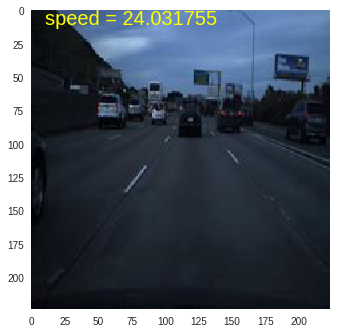

/content/data/frames/00201.jpg
(224, 224, 3)


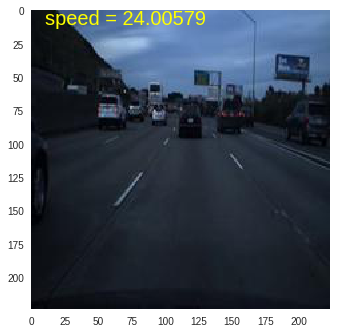

/content/data/frames/00202.jpg
(224, 224, 3)


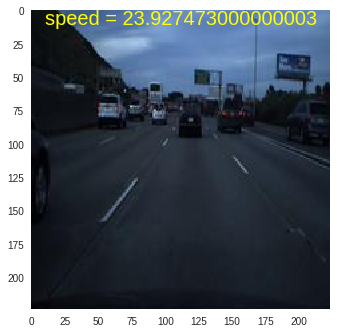

/content/data/frames/00203.jpg
(224, 224, 3)


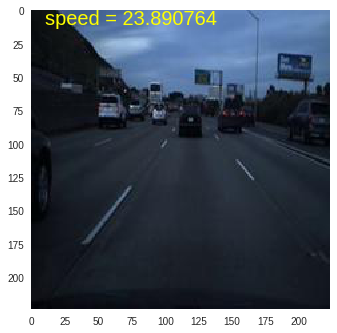

/content/data/frames/00204.jpg
(224, 224, 3)


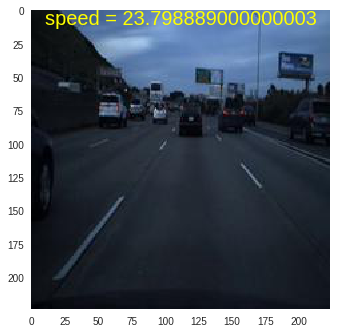

In [6]:
for i in range(200,205):
  img_path = '/content/data/frames/'+ll[i]
  view_img_speed(img_path)

## Dataloader

In [0]:
# import numpy as np
# import torch
# import os
# import cv2

# class Dataset:
#     def __init__(self,
#                  folder:str,
#                  batch_size:int,
#                  timesteps:int,
#                  windowsteps:int,
#                  shift:int,
#                  train:bool):
#         self.folder  = folder
#         self.batch_size = batch_size
#         self.timesteps  = timesteps
#         self.train = train
#         self.images = sorted(os.listdir(folder + 'frames/'))
#         self.labels = open(folder + 'scaled_train.txt').readlines()
#         self.data = self._sliding_window(self.images, shift, windowsteps)

#     def _sliding_window(self, images, shift, windowsteps):
#         """ slide window by the windowsteps to make dataset """
#         window = []
#         num_windows = len(images) - self.timesteps + 1
#         for i in range(shift, num_windows, windowsteps):
#             if self.train:
#                 labels = [float(label)
#                     for label in self.labels[i:i+self.timesteps]]
#                 window.append([images[i:i+self.timesteps], labels[-1]])
#             else:
#                 window.append([images[i:i+self.timesteps], None])
#         return window

#     def get_batcher(self, shuffle=False):
#         """ produces batch generator """

#         if shuffle: np.random.shuffle(self.data)
#         data = iter(self.data)
#         while True:
#             x = np.zeros((self.batch_size, self.timesteps, 224, 224, 3))
#             y = np.zeros((self.batch_size, 1))
#             for b in range(self.batch_size):
#                 images, label = next(data)
#                 for t, img_name in enumerate(images):
#                     image_path = self.folder + 'frames/' + img_name
#                     img = cv2.imread(image_path)
#                     x[b, t] = img
#                 y[b] = label
#             x = np.transpose(x, [0, 4, 1, 2, 3])
#             x = torch.from_numpy(x)
#             y = torch.from_numpy(y)
#             yield x, y

In [0]:
import numpy as np
import torch
import os
import cv2

class Dataset1:
    def __init__(self,
                 X,
                 y,
                 batch_size:int,
                 timesteps:int,
                 windowsteps:int,
                 shift:int,
                 train:bool):
        self.batch_size = batch_size
        self.timesteps  = timesteps
        self.train = train
        self.images = list(X)
        self.labels = list(y)
        self.data = self._sliding_window(self.images, shift, windowsteps)

    def _sliding_window(self, images, shift, windowsteps):
        """ slide window by the windowsteps to make dataset """
        window = []
        num_windows = len(images) - self.timesteps + 1
        for i in range(shift, num_windows, windowsteps):
            if self.train:
                labels = [float(label)
                    for label in self.labels[i:i+self.timesteps]]
                window.append([images[i:i+self.timesteps], labels[-1]])
#             else:
#                 window.append([images[i:i+self.timesteps], None])
        return window

    def get_batcher(self, shuffle=False):

        if shuffle: np.random.shuffle(self.data)
        data = iter(self.data)
        while True:
            x = np.zeros((self.batch_size, self.timesteps, 224, 224, 3))
            y = np.zeros((self.batch_size, 1))
            for b in range(self.batch_size):
                images, label = next(data)
                for t, img_name in enumerate(images):
#                     print(images)
                    x[b, t] = np.array(img_name)
                y[b] = label
            x = np.transpose(x, [0, 4, 1, 2, 3])
            x = torch.from_numpy(x)
            y = torch.from_numpy(y)
            yield x, y

In [0]:
trainloader = Dataset1(imgs, labels, batch_size=50, timesteps=6, windowsteps=6,shift=0, train=True)
validloader = Dataset1(valid_imgs, valid_labels, batch_size=64, timesteps=6, windowsteps=6,shift=0, train=True)

In [6]:
for i in d.get_batcher():
  print(i[0].shape, i[1].shape)
  break

torch.Size([300, 3, 6, 224, 224]) torch.Size([300, 1])


In [0]:
# d = Dataset(folder='/content/data/', batch_size=300, timesteps=6, windowsteps=6,shift=0, train=True)

In [9]:
# for i in d.get_batcher():
#   print(i[0].shape, i[1].shape)
#   break

torch.Size([300, 3, 10, 224, 224]) torch.Size([300, 1])


In [6]:
%whos

Variable       Type             Data/Info
-----------------------------------------
Dataset1       type             <class '__main__.Dataset1'>
Image          module           <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
MinMaxScaler   type             <class 'sklearn.preprocessing.data.MinMaxScaler'>
cv2            module           <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
data_df        DataFrame                       0\n0      <...>n[20400 rows x 1 columns]
i              int              20399
img            JpegImageFile    <PIL.JpegImagePlugin.Jpeg<...>24x224 at 0x7F51BB078B00>
img_path       str              /content/data/frames/20399.jpg
imgs           ndarray          16320x224x224x3: 2456616960 elems, type `uint8`, 2456616960 bytes (2342.8125 Mb)
labels         ndarray          16320x1: 16320 elems, type `float64`, 130560 bytes (127.5 kb)
np             module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os             module     

In [0]:
del valid_imgs, valid_labels, imgs, labels

# Model

In [13]:
from torchvision import models

alexnet = models.squeezenet1_1(pretrained=True)
alexnet


# for param in alexnet.features[10:].parameters():
#     param.requires_grad = True
    
# for param in alexnet.classifier.parameters():
#     param.requires_grad = True
    
# for param in alexnet.avgpool.parameters():
#     param.requires_grad = True

# for param in alexnet.layer4[1].parameters():
#     param.requires_grad = True

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /root/.torch/models/squeezenet1_1-f364aa15.pth
4966400it [00:00, 43801499.23it/s]


SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0

In [0]:
import torch.nn as nn
from torch.autograd import Variable as V
import torch as th
from torchvision import models


class AlexLSTM(nn.Module):
    def __init__(self, n_layers=2, h_size=420):
        super(AlexLSTM, self).__init__()
        print('Building AlexNet + LSTM model...')
        self.h_size = h_size
        self.n_layers = n_layers

        alexnet = models.alexnet(pretrained=True)
        for param in alexnet.features[10:].parameters():
            param.requires_grad = False

        for param in alexnet.avgpool.parameters():
            param.requires_grad = False
            
        self.conv = nn.Sequential(*list(alexnet.children())[:-1])

        self.lstm = nn.LSTM(9216, h_size, dropout=0.2, num_layers=n_layers)
        self.fc = nn.Sequential(
            nn.Linear(h_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        batch_size, timesteps = x.size()[0], x.size()[2]
        state = self._init_state(b_size=batch_size)

        convs = []
        for t in range(timesteps):
            conv = self.conv(x[:, :, t, :, :])
            conv = conv.view(batch_size, -1)
            convs.append(conv)
        convs = th.stack(convs, 0)
        lstm, _ = self.lstm(convs, state)
        logit = self.fc(lstm[-1])

        return logit

    def _init_state(self, b_size=1):
        weight = next(self.parameters()).data
        return (
            V(weight.new(self.n_layers, b_size, self.h_size).normal_(0.0, 0.01)),
            V(weight.new(self.n_layers, b_size, self.h_size).normal_(0.0, 0.01))
        )

In [0]:
import torch.nn as nn
from torch.autograd import Variable as V
import torch as th
from torchvision import models


class ResLSTM(nn.Module):
    def __init__(self, n_layers=2, h_size=512):
        super(ResLSTM, self).__init__()
        print('Building AlexNet + LSTM model...')
        self.h_size = h_size
        self.n_layers = n_layers

        resnet = models.vgg11_bn(pretrained=True)

        for param in resnet.features[25:].parameters():
            param.requires_grad = False
        self.conv = nn.Sequential(*list(resnet.children())[:-1])

        self.lstm = nn.LSTM(25088, h_size, dropout=0.2, num_layers=n_layers)
        self.fc = nn.Sequential(
            nn.Linear(h_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        batch_size, timesteps = x.size()[0], x.size()[2]
        state = self._init_state(b_size=batch_size)

        convs = []
        for t in range(timesteps):
            conv = self.conv(x[:, :, t, :, :])
            conv = conv.view(batch_size, -1)
            convs.append(conv)
        convs = th.stack(convs, 0)
        lstm, _ = self.lstm(convs, state)
        logit = self.fc(lstm[-1])

        return logit

    def _init_state(self, b_size=1):
        weight = next(self.parameters()).data
        return (
            V(weight.new(self.n_layers, b_size, self.h_size).normal_(0.0, 0.01)),
            V(weight.new(self.n_layers, b_size, self.h_size).normal_(0.0, 0.01))
        )

In [7]:
model = AlexLSTM()

model(torch.randn(5, 3, 5, 224, 224))

Building AlexNet + LSTM model...


tensor([[0.5187],
        [0.5143],
        [0.5194],
        [0.5127],
        [0.5176]], grad_fn=<SigmoidBackward>)

# Training loop

In [8]:
model.cuda()

AlexLSTM(
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): AdaptiveAvgPool2d(output_size=(6, 6))
  )
  (lstm): LSTM(9216, 420, num_layers=2, dropout=0.2)
  (fc): Sequential(
    (0): Linear(in_features=420, out_f

In [0]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [0]:

# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# valid_loss_min = np.Inf
# epochs = 50
# steps = 0
# # valid_loss_min = np.Inf

# train_losses, test_losses = [], []
# for e in range(epochs):
#     running_loss = 0
#     tr_accuracy = 0
#     for images, labels in d.get_batcher():
#         images = (images.type(torch.FloatTensor).cuda()-128)/255
#         labels = labels.type(torch.FloatTensor).cuda()
#         optimizer.zero_grad()

#         log_ps  = model(images)
#         loss = criterion(log_ps, labels)
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
        
        
#         train_losses.append(running_loss)


#     print("Epoch: {}/{} ".format(e+1, epochs),
#           "Training Loss: {:.8f} ".format(train_losses[-1]))
        
        
# plt.plot(train_losses, 'b', label='Training Loss')
# plt.show()

In [0]:

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
valid_loss_min = np.Inf
epochs = 50
steps = 0
# valid_loss_min = np.Inf

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    tr_accuracy = 0
    for images, labels in trainloader.get_batcher():
        images = (images.type(torch.FloatTensor).cuda()-128)/255
        labels = labels.type(torch.FloatTensor).cuda()
        optimizer.zero_grad()
#         print(images.type())
#         print(images)
        log_ps  = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in validloader.get_batcher():
                images = (images.type(torch.FloatTensor).cuda()-128)/255
                labels = labels.type(torch.FloatTensor).cuda()
                log_ps = model(images)
#                 print(log_ps)
                test_loss += criterion(log_ps, labels)

        
        model.train()
        
        train_losses.append(running_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.8f} ".format(train_losses[-1]),
              "Test Loss: {:.8f} ".format(test_losses[-1]))
        if test_loss <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          test_loss))
          torch.save(model.state_dict(), 'best_model.pt')
          valid_loss_min = test_loss
        
plt.plot(train_losses, 'b', label='Training Loss')
plt.plot(test_losses, 'r', label='Validation Loss')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: generator 'Dataset1.get_batcher' raised StopIteration
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'Dataset1.get_batcher' raised StopIteration


Epoch: 1/50  Training Loss: 3.52339152  Test Loss: 0.50874954 
Validation loss decreased (inf --> 0.508750).  Saving model ...
Epoch: 2/50  Training Loss: 5.57072735  Test Loss: 1.20922697 
Epoch: 3/50  Training Loss: 4.73549508  Test Loss: 1.29435003 
Epoch: 4/50  Training Loss: 4.72856151  Test Loss: 1.28531110 
Epoch: 5/50  Training Loss: 4.54491528  Test Loss: 1.28369117 
Epoch: 6/50  Training Loss: 4.63666967  Test Loss: 1.29981601 
Epoch: 7/50  Training Loss: 4.50569422  Test Loss: 1.26354003 
Epoch: 8/50  Training Loss: 4.52155605  Test Loss: 1.29570031 
Epoch: 9/50  Training Loss: 4.47764166  Test Loss: 1.29017639 
Epoch: 10/50  Training Loss: 4.47588800  Test Loss: 1.28491187 
Epoch: 11/50  Training Loss: 4.47473170  Test Loss: 1.27990448 
Epoch: 12/50  Training Loss: 4.47370246  Test Loss: 1.27514172 
Epoch: 13/50  Training Loss: 4.47276513  Test Loss: 1.27061224 
Epoch: 14/50  Training Loss: 4.47194520  Test Loss: 1.26630461 
Epoch: 15/50  Training Loss: 4.47123137  Test Los

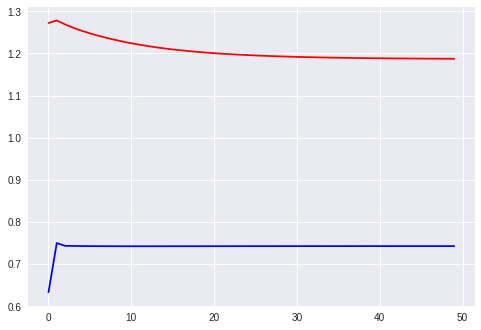

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_losses, 'b', label='Training Loss')
plt.plot(test_losses, 'r', label='Validation Loss')
plt.show()

In [15]:
import matplotlib.pyplot as plt

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
valid_loss_min = np.Inf
epochs = 50
steps = 0
# valid_loss_min = np.Inf

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    tr_accuracy = 0
    for images, labels in trainloader.get_batcher():
        images = (images.type(torch.FloatTensor).cuda()-128)/255
        labels = labels.type(torch.FloatTensor).cuda()
        optimizer.zero_grad()
#         print(images.type())
#         print(images)
        log_ps  = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in validloader.get_batcher():
                images = (images.type(torch.FloatTensor).cuda()-128)/255
                labels = labels.type(torch.FloatTensor).cuda()
                log_ps = model(images)
#                 print(log_ps)
                test_loss += criterion(log_ps, labels)

        
        model.train()
        
        train_losses.append(running_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.8f} ".format(train_losses[-1]),
              "Test Loss: {:.8f} ".format(test_losses[-1]))
        if test_loss <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          test_loss))
          torch.save(model.state_dict(), 'best_model.pt')
          valid_loss_min = test_loss
        
plt.plot(train_losses, 'b', label='Training Loss')
plt.plot(test_losses, 'r', label='Validation Loss')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: generator 'Dataset1.get_batcher' raised StopIteration
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: generator 'Dataset1.get_batcher' raised StopIteration


Epoch: 1/50  Training Loss: 0.74246560  Test Loss: 1.19529843 
Validation loss decreased (inf --> 1.195298).  Saving model ...
Epoch: 2/50  Training Loss: 0.74105285  Test Loss: 1.19635606 
Epoch: 3/50  Training Loss: 0.74086046  Test Loss: 1.19664538 
Epoch: 4/50  Training Loss: 0.74080314  Test Loss: 1.19670391 
Epoch: 5/50  Training Loss: 0.74078198  Test Loss: 1.19668043 
Epoch: 6/50  Training Loss: 0.74077420  Test Loss: 1.19662678 
Epoch: 7/50  Training Loss: 0.74076949  Test Loss: 1.19656098 
Epoch: 8/50  Training Loss: 0.74076888  Test Loss: 1.19649160 
Epoch: 9/50  Training Loss: 0.74076685  Test Loss: 1.19642079 
Epoch: 10/50  Training Loss: 0.74076696  Test Loss: 1.19634998 
Epoch: 11/50  Training Loss: 0.74077148  Test Loss: 1.19627941 


KeyboardInterrupt: ignored